In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('MBB.csv')
df=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 89ms/step - loss: 0.0173 - val_loss: 0.7144
Epoch 2/100
9/9 [==============================] - 0s 41ms/step - loss: 0.0039 - val_loss: 0.4968
Epoch 3/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0023 - val_loss: 0.3415
Epoch 4/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0013 - val_loss: 0.2681
Epoch 5/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0010 - val_loss: 0.2146
Epoch 6/100
9/9 [==============================] - 0s 39ms/step - loss: 8.3914e-04 - val_loss: 0.1755
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 8.3164e-04 - val_loss: 0.1288
Epoch 8/100
9/9 [==============================] - 0s 39ms/step - loss: 7.3352e-04 - val_loss: 0.0958
Epoch 9/100
9/9 [==============================] - 0s 37ms/step - loss: 5.7170e-04 - val_loss: 0.0841
Epoch 10/100
9/9 [==============================] - 0s 37ms/step - loss: 4.8729e-04 - val_loss: 0.0681

Epoch 81/100
9/9 [==============================] - 0s 37ms/step - loss: 1.2474e-04 - val_loss: 0.0045
Epoch 82/100
9/9 [==============================] - 0s 36ms/step - loss: 1.3929e-04 - val_loss: 0.0038
Epoch 83/100
9/9 [==============================] - 0s 35ms/step - loss: 1.4414e-04 - val_loss: 0.0037
Epoch 84/100
9/9 [==============================] - 0s 37ms/step - loss: 1.3731e-04 - val_loss: 0.0027
Epoch 85/100
9/9 [==============================] - 0s 36ms/step - loss: 1.3690e-04 - val_loss: 0.0040
Epoch 86/100
9/9 [==============================] - 0s 37ms/step - loss: 1.3571e-04 - val_loss: 0.0039
Epoch 87/100
9/9 [==============================] - 0s 35ms/step - loss: 1.4008e-04 - val_loss: 0.0043
Epoch 88/100
9/9 [==============================] - 0s 37ms/step - loss: 1.8624e-04 - val_loss: 0.0047
Epoch 89/100
9/9 [==============================] - 0s 35ms/step - loss: 1.6619e-04 - val_loss: 0.0051
Epoch 90/100
9/9 [==============================] - 0s 37ms/step - loss: 

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 9ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 2618.2979375128525
Testing RMSE: 4823.418269248193
Validation MAPE: 9.743702327292793
Testing MAPE: 20.498861573276407
Validation MAE: 1982.3346566746293
Testing MAE: 3680.589514695361


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[len(val_data)-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):

    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.48897256 0.50295199 0.49130246 0.44703426 0.46800341 0.47732303
 0.47499313 0.4610137  0.50295199 0.50062208 0.51227161 0.51460152
 0.51460152 0.51227161 0.51460152 0.51460152 0.51460152 0.52625104
 0.56818934 0.57517905 0.57750896 0.58216877 0.56119962 0.57517905
 0.54489028 0.54722019 0.53091085 0.53557066 0.51926133 0.52159123
 0.52392114 0.51693142 0.50295199 0.49596227 0.50295199 0.51460152
 0.5076118  0.54489028 0.53091085 0.51460152 0.50994171 0.48897256
 0.46800341 0.46800341 0.48664265 0.47499313 0.4633436  0.47033332
 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351
 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322 0.47499313
 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142 0.51460152
 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104 0.53091085
 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142 0.51460152
 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152 0.51460152
 0.51926133 0.52159123 0.52392114 0.51227161 0.507

7 day output [[0.5724433]]
8 day input [0.50295199 0.50062208 0.51227161 0.51460152 0.51460152 0.51227161
 0.51460152 0.51460152 0.51460152 0.52625104 0.56818934 0.57517905
 0.57750896 0.58216877 0.56119962 0.57517905 0.54489028 0.54722019
 0.53091085 0.53557066 0.51926133 0.52159123 0.52392114 0.51693142
 0.50295199 0.49596227 0.50295199 0.51460152 0.5076118  0.54489028
 0.53091085 0.51460152 0.50994171 0.48897256 0.46800341 0.46800341
 0.48664265 0.47499313 0.4633436  0.47033332 0.47499313 0.48431275
 0.49363237 0.49130246 0.47965294 0.46567351 0.49363237 0.47732303
 0.47732303 0.47033332 0.47266322 0.47499313 0.47499313 0.49130246
 0.50062208 0.50295199 0.51693142 0.51460152 0.51460152 0.53557066
 0.53790057 0.54023047 0.52625104 0.53091085 0.53091085 0.53790057
 0.53557066 0.52858095 0.51693142 0.51460152 0.50994171 0.5076118
 0.50994171 0.5052819  0.51460152 0.51460152 0.51926133 0.52159123
 0.52392114 0.51227161 0.5076118  0.51460152 0.51693142 0.52625104
 0.52625104 0.53324076 0

15 day output [[0.5830693]]
16 day input [0.51460152 0.52625104 0.56818934 0.57517905 0.57750896 0.58216877
 0.56119962 0.57517905 0.54489028 0.54722019 0.53091085 0.53557066
 0.51926133 0.52159123 0.52392114 0.51693142 0.50295199 0.49596227
 0.50295199 0.51460152 0.5076118  0.54489028 0.53091085 0.51460152
 0.50994171 0.48897256 0.46800341 0.46800341 0.48664265 0.47499313
 0.4633436  0.47033332 0.47499313 0.48431275 0.49363237 0.49130246
 0.47965294 0.46567351 0.49363237 0.47732303 0.47732303 0.47033332
 0.47266322 0.47499313 0.47499313 0.49130246 0.50062208 0.50295199
 0.51693142 0.51460152 0.51460152 0.53557066 0.53790057 0.54023047
 0.52625104 0.53091085 0.53091085 0.53790057 0.53557066 0.52858095
 0.51693142 0.51460152 0.50994171 0.5076118  0.50994171 0.5052819
 0.51460152 0.51460152 0.51926133 0.52159123 0.52392114 0.51227161
 0.5076118  0.51460152 0.51693142 0.52625104 0.52625104 0.53324076
 0.54256038 0.54023047 0.52392114 0.53091085 0.53324076 0.54148686
 0.54825771 0.55391592

23 day output [[0.5899977]]
24 day input [0.54489028 0.54722019 0.53091085 0.53557066 0.51926133 0.52159123
 0.52392114 0.51693142 0.50295199 0.49596227 0.50295199 0.51460152
 0.5076118  0.54489028 0.53091085 0.51460152 0.50994171 0.48897256
 0.46800341 0.46800341 0.48664265 0.47499313 0.4633436  0.47033332
 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351
 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322 0.47499313
 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142 0.51460152
 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104 0.53091085
 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142 0.51460152
 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152 0.51460152
 0.51926133 0.52159123 0.52392114 0.51227161 0.5076118  0.51460152
 0.51693142 0.52625104 0.52625104 0.53324076 0.54256038 0.54023047
 0.52392114 0.53091085 0.53324076 0.54148686 0.54825771 0.55391592
 0.56232053 0.56667328 0.56758082 0.57186282 0.57244331 0.57714045
 0.57960337 0.582084 

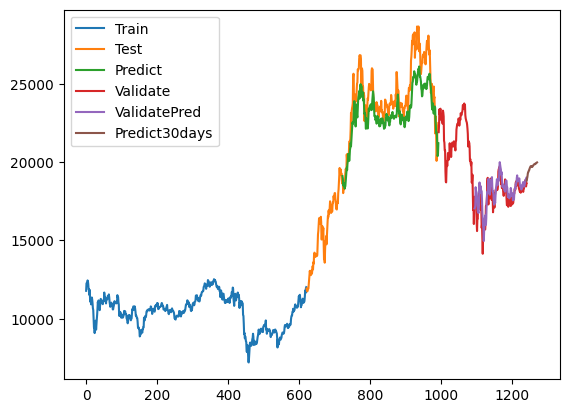

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()